# An Optimal Algorithm for the Freeze-Tag Problem in 2D

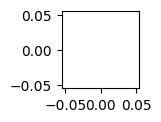

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.plot([])

In [14]:
#import matplotlib.pyplot as plt
#plt.plot([])

# Warning! Constants are imported as constant only, so 'from ... import *' will not work properly
import freeze_tag_mini as ft
from math import pi, sin, cos

### Optimal wake-up times for $n$ points regularly spaced on the unit circle ($\ell_2$ norm)

In [15]:
for n in range(0,12):
    P = ft.generate_regular_polygon(n) + [(0,0)] # a circle and its center
    x,T = ft.optimal_tree(n,P,ft.dist_L2) # compute the optimal tree
    print(f"regular({n}) = {x:.3f}")

regular(0) = 0.000
regular(1) = 1.000
regular(2) = 3.000
regular(3) = 2.732
regular(4) = 3.828
regular(5) = 3.351
regular(6) = 3.732
regular(7) = 3.431
regular(8) = 3.613
regular(9) = 3.416
regular(10) = 3.520
regular(11) = 3.383


### Lower bound for $\ell_p$ norm

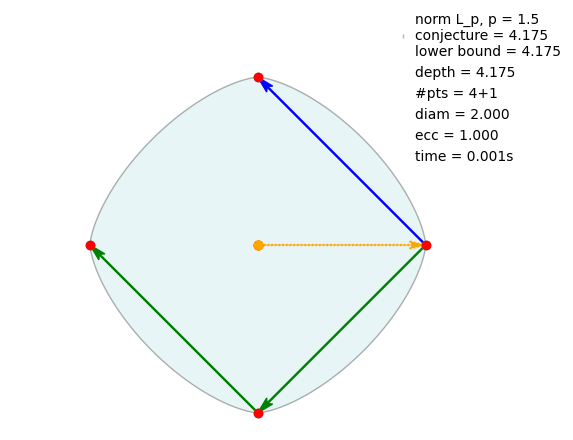

In [16]:
ft.LP_NORM = 1.5 # p for L_p
ft.SEED = -1 # do not display seed
ft.PROCESS_TIME = 0 # elapsed time in seconds in display draw_all()

P = [(0,0)] # the center of the circle
if 1 <= ft.LP_NORM <= 2:
  P += [(1,0),(0,1),(-1,0),(0,-1)]
else:
  u = 1/2**(1/ft.LP_NORM)
  P += [(u,u),(-u,u),(-u,-u),(u,-u)]

x,T = ft.optimal_tree(0,P,ft.dist_Lp)
u = 1 + 2**(1+max(1/ft.LP_NORM,1-1/ft.LP_NORM))
ft.draw_all(f'norm L_p, p = {ft.LP_NORM}\nconjecture = {u:.3f}\nlower bound',x,T)

### Lower bound in $\ell_1$ norm for a square of diameter $1$ with $6+1$ points with wake-up time $2+1/6$

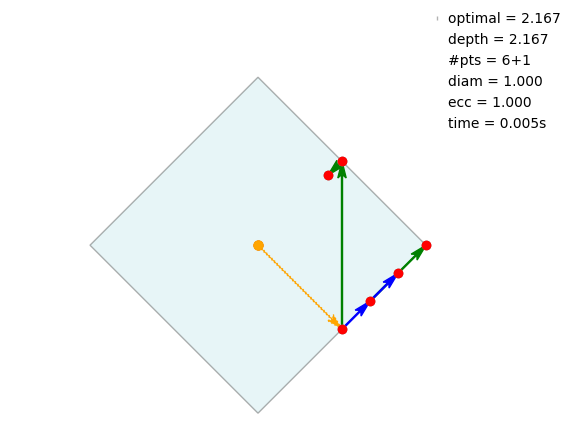

In [17]:
ft.SEED = -1 # does not display seed
ft.PROCESS_TIME = 0 # elapsed time in seconds for display draw_all()

eps=1/12 # best value, if eps=1/6 => depth = 2.000
P = [
    (0,0),(1/2,1/2),(1/2,-1/2),(1,0), # p0,p2,p5,p4 (the square)
    (1/2-eps,    1/2-eps),            # p1
    (1-2*eps,   -2*eps),              # p3
    (1/2+2*eps, -1/2+2*eps),          # p6
    ]

x,T = ft.optimal_tree(0,P,ft.dist_L1)
ft.draw_all('optimal',x,T)

### The complete binary tree is not always optimal even if $n = 2^k-1$, here in $\ell_2$ norm

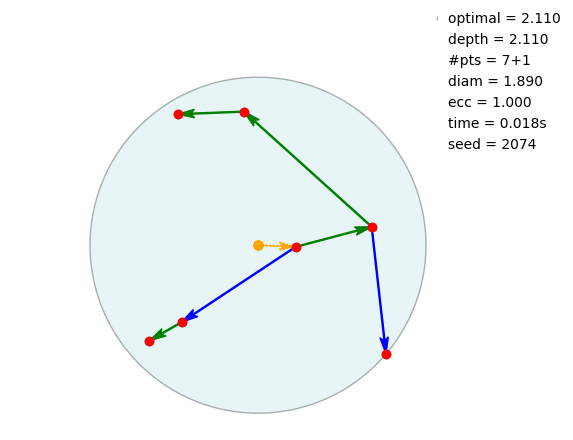

In [18]:
ft.init_seed(2074) # set SEED
n = 2**3 - 1 # number of points (asleep robots)
P = ft.generate_von_mises(n,0.5) # uniformly random on the disc
ft.normalize_bc(P, ft.dist_L2) # add ROOT = (0,0) at the end of the list POINTS
x,T = ft.optimal_tree() # compute the optimal tree
ft.draw_all('optimal',x,T) # display results

### $n=4$ points in convex position having a crossing (apart from the first edge)

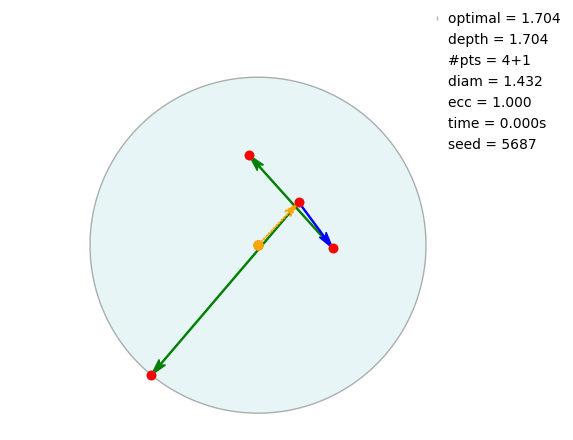

In [19]:
ft.init_seed(5687) # set SEED
P = ft.generate_convex(4) # points in convex position
ft.normalize_bc(P, ft.dist_L2) # add ROOT = (0,0) at the end of the list POINTS
x,T = ft.optimal_tree() # compute the optimal tree
ft.draw_all('optimal',x,T) # display results

### $n=11$ points in convex position having $3$ crossings (apart from the first edge)

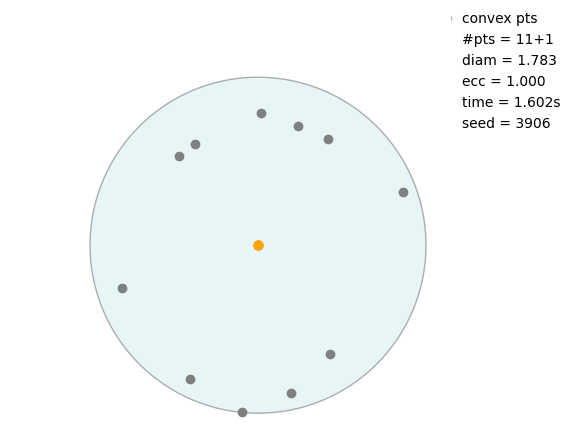

File /Users/gavoille/Freeze-Tag/fig.svg saved.


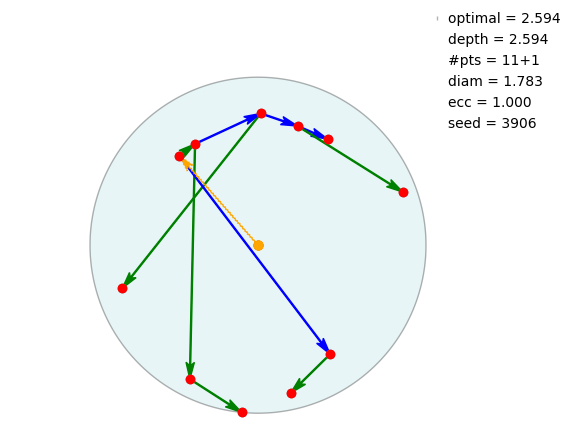

In [20]:
ft.init_seed(3906) # set SEED
n = 11 # number of points (asleep robots)
P = ft.generate_convex(n) # points in convex position
ft.normalize_bc(P, ft.dist_L2) # add ROOT = (0,0) at the end of the list POINTS
x,T = ft.optimal_tree() # compute the optimal tree
ft.draw_all('convex pts') # draw the points
ft.draw_all('optimal',x,T,save='fig.svg') # draw the tree and save it the figure
# T = [11, [5, [6, [7, [8, [9], [10]], [4]], [3, [2]]], [0, [1]]]]
# T = [11, [5, [6, [7, [8, [9], [10]], [4]], [0, [1]]], [3, [2]]]]
# ft.draw_all('???????',x,T)

### A tree with a 'controlled' shape in $\ell_2$ norm

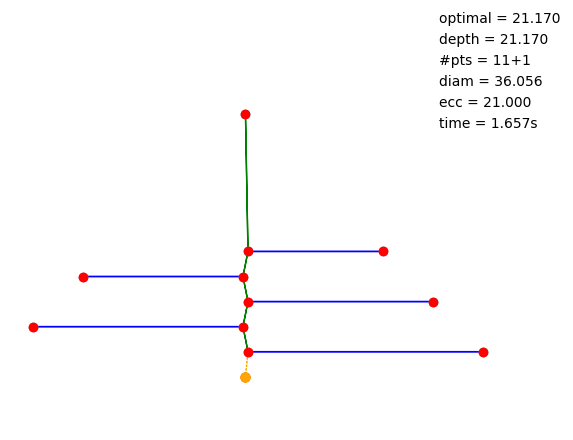

In [21]:
ft.SEED=-1 # no seed to display
h, eps = 20, 0.2
P = [
    (0,-1),    (0,h),
    (+eps,1),  (+h-1,1),
    (-eps,3),  (-h+3,3),
    (+eps,5),  (+h-5,5),
    (-eps,7),  (-h+7,7),
    (+eps,9),  (+h-9,9),
    #(-eps,11), (-h+11,11) # works, but time consuming
    ]
x,T = ft.optimal_tree(0,P,ft.dist_L2)
ft.draw_all('optimal',x,T,disc=False)

### Lower bounds for odd $n = 2k+1$ points on a circle (in $\ell_2$ norm) showing that the worst-case on a circle is not the uniform case for $n$ odd

The generic counter-example (see cell below) has $2k$ angles of value $x$ plus one of angle of value $y$, $0 < y < x$. So $2kx + y = 2\pi = nx - \varepsilon$, where $\varepsilon = x - y$. If $\varepsilon=0$ (or $x=y$), then this is the uniform case. To find the optimal $\varepsilon$, we start by searching for it experimentally using binary search with optimal_tree(). Then, we observe the longest branches in the tree solutions (we sum the chords lengths) with some $\varepsilon_1 < \varepsilon$, then with some $\varepsilon_2 > \varepsilon$. This gives to us equations ($E_1$) and ($E_2$) respectively. The solution of $E_1 = E_2$ (approximated by Maple) confirms the value of optimal $\varepsilon$. Here, $\mathrm{chord}(x) = 2\sin(x/2)$ denotes the length of the chord for an angle of $x$. Note that $\mathrm{chord}(y) = \mathrm{chord}(kx)$, and that we must have $x \in [2\pi/n,\pi/k]$. The solutions around the optimal $\varepsilon$ are without crossovers in general, except for $k=2$ with the $\mathrm{chord}(y) + \mathrm{chord}(y+x)$ branch. The same methodology can be applied for other norms, like $\ell_1$.

Here are the best values for $\varepsilon = \varepsilon(k)$ obtained so far:

---
- $n=3~(k=1)$
- $\varepsilon=0$ => depth = $2.732$ (uniform case)
- $\varepsilon=𝜋$ => depth = $3.000$ (worst-case)

---
- $n=5~(k=2)$
- $\varepsilon=0$ => depth = $3.351$ (uniform case)
- $\varepsilon=0.5827617039$ => depth = $3.535628694$ (worst-case)
- $x$ is root of $2\mathrm{chord}(x) = \mathrm{chord}(y) + \mathrm{chord}(y+x)$, where $y = 2\pi - 2kx$, and $x\in[2\pi/5,\pi/2]$
- [ $x=1.373189402, y=0.7904276980$ ]
- NB. $\mathrm{chord}(y+x) = \mathrm{chord}(3x)$, and the tree solution for $> \varepsilon$ has a crossing.

---
- $n=7~(k=3)$
- $\varepsilon=0$ => depth = $3.431$ (uniform case)
- $\varepsilon=0.3784299788$ => depth = $3.544911380$ (worst-case)
- $x$ is root of $\mathrm{chord}(x) + \mathrm{chord}(2x) = \mathrm{chord}(y) + \mathrm{chord}(3x)$, where $y = 2\pi - 2kx$, and $x\in[2\pi/7,\pi/3]$
- [ $x=0.9516593267, y=0.5732293479$ ]

---
- $n=9~(k=4)$
- $\varepsilon=0$ => depth = $3.416$ (uniform case)
- $\varepsilon=0.2814874303$ => depth = $3.490388052$ (worst-case)
- $x$ is root of $\mathrm{chord}(x) + \mathrm{chord}(3x) = \mathrm{chord}(y) + \mathrm{chord}(x) + \mathrm{chord}(2x)$, where $y = 2\pi - 2kx$, and $x\in[2\pi/9,\pi/4]$
- [ $x=0.7294080820, y=0.5732293479$ ]

---
- $n=11~(k=5)$
- $\varepsilon=0$ => depth = $3.383$ (uniform case)
- $\varepsilon=0.2991993005$ => depth = $3.451257847$ (worst-case)
- $x$ is root of $\mathrm{chord}(x) + \mathrm{chord}(4x) = \mathrm{chord}(y) + \mathrm{chord}(x) + \mathrm{chord}(3x)$, where $y = 2\pi - 2kx$, and $x\in[2\pi/11,\pi/5]$
- [ $x=0.5983986008, y=0.2991993003$, NB. $y=\varepsilon$, soit $x=2y$ ]

---
- $n=13~(k=6)$
- $\varepsilon=0$ => depth = $3.349$ (uniform case)
- $\varepsilon=0.2940862069$ => depth = $3.407695572$ (worst-case)
- $x$ is root of $\mathrm{chord}(x) + \mathrm{chord}(5x) = \mathrm{chord}(y) + \mathrm{chord}(x) + \mathrm{chord}(4x)$, where $y = 2\pi - 2kx$, and $x\in[2\pi/13,\pi/6]$
- [ $x=0.5059439627, y=0.2118577558$ ]

---
- $n=15~(k=7)$
- $\varepsilon=0$ => depth = $3.318$ (uniform case)
- $\varepsilon=0.2453594624$ => depth = $3.392885535$ (worst-case)
- $x$ is root of $2\mathrm{chord}(x) + \mathrm{chord}(4x) = \mathrm{chord}(y) + \mathrm{chord}(x) + \mathrm{chord}(5x)$, where $y = 2\pi - 2kx$, and $x\in[2\pi/15,\pi/7]$
- [ $x=0.4352363180, y=0.1898768556$ ]

---
- $n=17~(k=8)$
- $\varepsilon=0$ => depth = $3.331$ (uniform case)
- $\varepsilon=0.1920896074$ => depth = $3.386640398$ (worst-case)
- $x$ is root of $2\mathrm{chord}(x) + \mathrm{chord}(5x) = \mathrm{chord}(y) + \mathrm{chord}(6x)$, where $y = 2\pi - 2kx$, and $x\in[2\pi/17,\pi/8]$
- [ $x=0.3808985244, y=0.1888089170$ ]

---

x = 0.9516593265685123, but should be in [0.8976,1.0472]
File /Users/gavoille/Freeze-Tag/fig.svg saved.


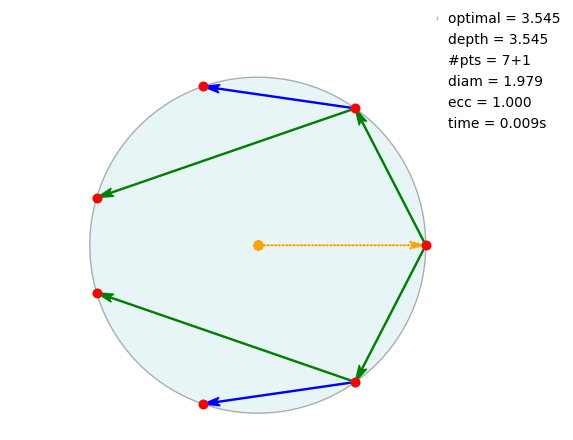

In [22]:
ft.SEED = -1 # do not display SEED
ft.PROCESS_TIME = 0 # elapsed time temps to display in draw_all()

k = 3
n = 2*k + 1
eps = 0.3784299788 # x-y
x = (2*pi+eps)/n # angle x
# x = 0.37
# eps = n*x - 2*pi
print(f"x = {x}, but should be in [{2*pi/n:.4f},{pi/k:.4f}]")
if x < 2*pi/n or x > pi/k: quit()
P = [(0,0),(1,0)] # root and first point
t = 0
for i in range(k):
    t += x
    P += [(cos(t),sin(t)),(cos(t),-sin(t))] # add two points 

x,T = ft.optimal_tree(0,P,ft.dist_L2)
ft.draw_all('optimal',x,T,save='fig.svg')

# A more general construction, still for n = 2k+1 points. Chords are symmetric from (1,0) and are composed of k-1 chords of angle x1, followed by one of angle x2, and then the remaining. It happens that the worst-case is whenever there is only one chord of angle < 2𝜋/n and all the other greater and equal.

# k=3 # Best: 3.544911380, eps1 = eps2 = 0.3784299788
# k=4 # Best: 3.490388052, eps1 = eps2 = 0.2814874303
# k=6 # Best: 3.407695572, eps1 = eps2 = 0.2940862069
# k=7 # Best: 3.392885535, eps1 = eps2 = 0.2453594624
# eps1, eps2 = 0.3, 0.1
# n = 2*k + 1
# x1 = (2*pi+eps1)/n
# x2 = (2*pi+eps2)/n
# P = [(0,0),(1,0)]
# t = 0
# for i in range(k):
#     if i<k-1: t += x1
#    else: t += x2
#    P += [(cos(t),sin(t)),(cos(t),-sin(t))]
# ft.SEED = -1
# ft.PROCESS_TIME = 0
# x,T = optimal_tree(0,P,dist_L2)
# draw_all('optimal',x,T)

### Two inscribed $n$-gons with different radius

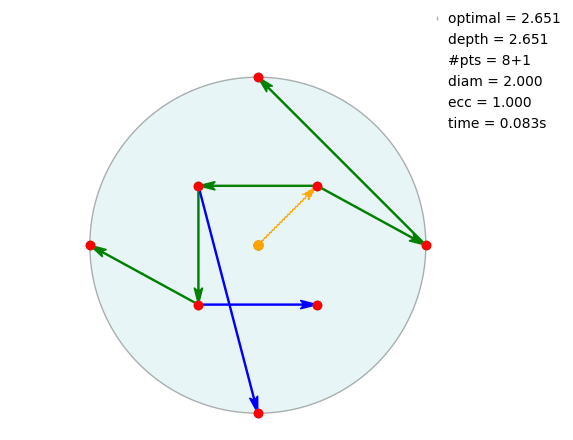

In [23]:
ft.SEED = -1 # do not display SEED
n = 4 # number of sides of each n-gons
r1, r2 = 1.0, 0.5 # r2 = 0.5, 0.8 or 0.9 gives rather different shape trees
P = [(0,0)]
for i in range(n):
    P += [(r1*cos(i*2*pi/n),r1*sin(i*2*pi/n))]
    P += [(r2*cos(i*2*pi/n+pi/n),r2*sin(i*2*pi/n+pi/n))]
x,T = ft.optimal_tree(0,P,ft.dist_L2)
ft.draw_all('optimal',x,T)

### Search for a worst-case for $n = 8$ points ($\ell_2$ norm)

x = 2.34352457302443
T = [8, [6, [4, [2, [5], [7]], [1, [3]]], [0]]]
ft.POINTS = [(-0.8517104894840652, 0.4053985820237106), (0.21077865455389472, 0.9591255647552167), (0.378988753049117, -0.5489884178113221), (-0.0027347253259811435, 0.9999962606317043), (0.6297350510976314, -0.3162636551124339), (-0.42988109024091553, -0.5780038610508595), (0.5725444102412329, -0.38824037692073743), (-0.507720563890914, -0.5330240965152787), (0.0, 0.0)]
x = 2.7515595204571954
T = [8, [5, [2, [3, [6]], [4]], [1, [0], [7]]]]
ft.POINTS = [(-0.4235229146932943, 0.8764402629204343), (-0.6404856719998917, -0.5086687438838305), (-0.3419906782827621, -0.7255026276489608), (0.33292739516034064, -0.7510016720840152), (0.49069035784055026, 0.8686856290304633), (-0.4705433199756285, -0.6546779158034347), (0.9073911439414452, -0.09462822921209373), (0.14553368800924057, 0.9893532966814377), (0.0, 0.0)]
x = 2.870396973754615
T = [8, [6, [3, [2, [4]], [0, [5]]], [1, [7]]]]
ft.POINTS = [(0.49679068934950255, 0.66400

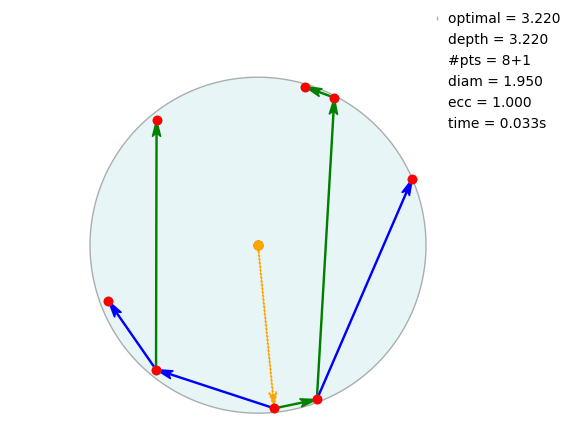

In [24]:
n = 8 # number of points
NB = 200 # number of tries
ft.DIST = ft.dist_L2 # set the distance function

xmax = 0
for i in range(NB):
    # P = generate_von_mises(n,0.1,2,20) # close to the regular case
    P = ft.generate_von_mises(n,0) # random on the circle
    ft.normalize_bc(P)
    x,T = ft.optimal_tree()
    if x>xmax:
        xmax,Tmax,Pmax = x,T,ft.POINTS
        print(f"x = {x}")
        print(f"T = {T}")
        print(f"ft.POINTS = {ft.POINTS}")

# Maximum for ft.generate_von_mises(8,0,8,10) with NB = 10,000
# x = 3.570593145854709
# T = [0, [4, [3, [8, [2]], [7]], [5, [1], [6]]]]
# ft.POINTS = [(0.0, 0.0), (-0.9985549564600698, 0.011827106584179929), (-0.006175724711713601, -0.9996790979426582), (0.9996797961518151, 0.018006435511381674), (0.7213105266396888, 0.6916888441126671), (-0.7102685631588145, 0.7017728500934621), (-0.040494833692801824, 0.9979330572465028), (-0.6851648746614944, -0.7272314994841055), (0.7196686298933903, -0.69431769612143)]

# Maximum for ft.generate_von_mises(8,0.1) with NB = 10,000
# (many crossings ...)
# x = 3.0498501436246337
# T = [0, [3, [1, [8, [2]], [7]], [5, [4], [6]]]]
# ft.POINTS = [(0.0, 0.0), (-0.38313149525860823, -0.8944996655519788), (0.24967021557384517, 0.9683309266233882), (-0.1987667780636083, -0.8715771404052549), (-0.9335487858180874, 0.25552358830278954), (-0.6785219343019202, -0.6434257547307705), (0.8959422895728233, -0.26045916474825553), (0.7954899585093611, 0.5057387380199572), (0.2528665297861946, 0.9403684724901246)]

x,T,ft.POINTS = xmax,Tmax,Pmax
ft.draw_all('optimal',x,T)

### Random points in the unit disk w.r.t. the hexagonal distance function 

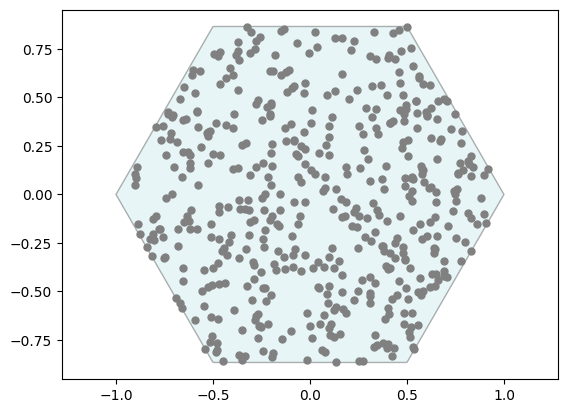

In [ ]:
P = ft.generate_von_mises(500,0.5) # 0.5 -> 0 for unit circle
d = ft.dist_polygon
ft.NGON = 6
ft.distortion(P,ft.dist_L2,d)
plt.clf()
plt.axis('equal')
ft.draw_disc(d)
ft.draw_points(P)
plt.show()